In [181]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

## Data preprocessing

In [230]:
file_path = 'data/db2/output_results.txt'  # Adjust path as needed
columns = ["Query ID", "Subject ID", "Percent Identity", "Alignment Length", "Mismatches", "Gap Opens", "Query Start", "Query End", "Subject Start", "Subject End", "E-value", "Bit Score"]

In [231]:
blast_df = pd.read_csv(file_path, sep="\t", names=columns)
print(blast_df.head())

                      Query ID                        Subject ID  \
0  albumin_Chlorocebus_sabaeus       albumin_Chlorocebus_sabaeus   
1  albumin_Chlorocebus_sabaeus       albumin_Macaca_fascicularis   
2  albumin_Chlorocebus_sabaeus            albumin_Macaca_mulatta   
3  albumin_Chlorocebus_sabaeus              albumin_Papio_anubis   
4  albumin_Chlorocebus_sabaeus  albumin_Trachypithecus_francoisi   

   Percent Identity  Alignment Length  Mismatches  Gap Opens  Query Start  \
0           100.000               608           0          0            1   
1            99.013               608           6          0            1   
2            98.849               608           7          0            1   
3            98.520               608           9          0            1   
4            95.888               608          25          0            1   

   Query End  Subject Start  Subject End  E-value  Bit Score  
0        608              1          608      0.0     1236.0  
1 

In [271]:
sequence_ids = blast_df['Query ID'].unique()
similarity_matrix = pd.DataFrame(np.zeros((len(sequence_ids), len(sequence_ids))), index=sequence_ids, columns=sequence_ids, dtype=float)

for _, row in blast_df.iterrows():
    query = row["Query ID"]
    subject = row["Subject ID"]
    identity = row["Percent Identity"]
    similarity_matrix.loc[query, subject] = identity
    
similarity_matrix = similarity_matrix.loc[np.random.permutation(similarity_matrix.index), np.random.permutation(similarity_matrix.columns)]

In [272]:
similarity_matrix

,cathepsin_Macaca_fascicularis,galectin_Rhinopithecus_roxellana,amylase_Homo_sapiens,amylase_Papio_anubis,prothrombin_Trachypithecus_francoisi,galectin_Trachypithecus_francoisi,galectin_Homo_sapiens,lactase_Papio_anubis,thyroxine_Papio_anubis,galectin_Papio_anubis,...,amylase_Trachypithecus_francoisi,collagen_Papio_anubis,albumin_Rhinopithecus_roxellana,epsin_Homo_sapiens,albumin_Chlorocebus_sabaeus,cathepsin_Macaca_mulatta,galectin_Macaca_fascicularis,collagen_Trachypithecus_francoisi,prothrombin_Rhinopithecus_roxellana,thyroxine_Trachypithecus_francoisi
amylase_Rhinopithecus_roxellana,0.000,0.000,95.695,96.673,0.000,0.000,0.000,44.000,0.000,0.000,...,98.826,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
cathepsin_Macaca_mulatta,99.698,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,96.375,0.000,100.000,0.000,0.000,0.000,0.000
albumin_Rhinopithecus_roxellana,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,100.000,0.000,95.559,0.000,0.000,0.000,0.000,0.000
thyroxine_Macaca_fascicularis,0.000,0.000,0.000,0.000,0.000,0.000,0.000,27.083,99.277,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,97.831
galectin_Macaca_mulatta,0.000,95.775,0.000,0.000,0.000,94.648,85.070,27.660,0.000,84.334,...,0.000,0.000,0.000,0.000,0.000,0.000,92.348,0.000,0.000,0.000
galectin_Rhinopithecus_roxellana,0.000,100.000,0.000,0.000,0.000,95.775,84.789,0.000,0.000,83.290,...,0.000,0.000,0.000,0.000,0.000,0.000,89.974,0.000,0.000,0.000
albumin_Macaca_fascicularis,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,95.888,0.000,99.013,0.000,0.000,0.000,0.000,0.000
thyroxine_Papio_anubis,0.000,0.000,0.000,0.000,0.000,0.000,0.000,27.083,100.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,97.590
prothrombin_Macaca_fascicularis,0.000,0.000,0.000,0.000,96.032,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,94.921,0.000
galectin_Trachypithecus_francoisi,0.000,95.775,0.000,0.000,0.000,100.000,82.535,27.660,0.000,81.201,...,0.000,0.000,0.000,0.000,0.000,0.000,87.599,0.000,0.000,0.000


## Clustering

### Hierarchical clustering

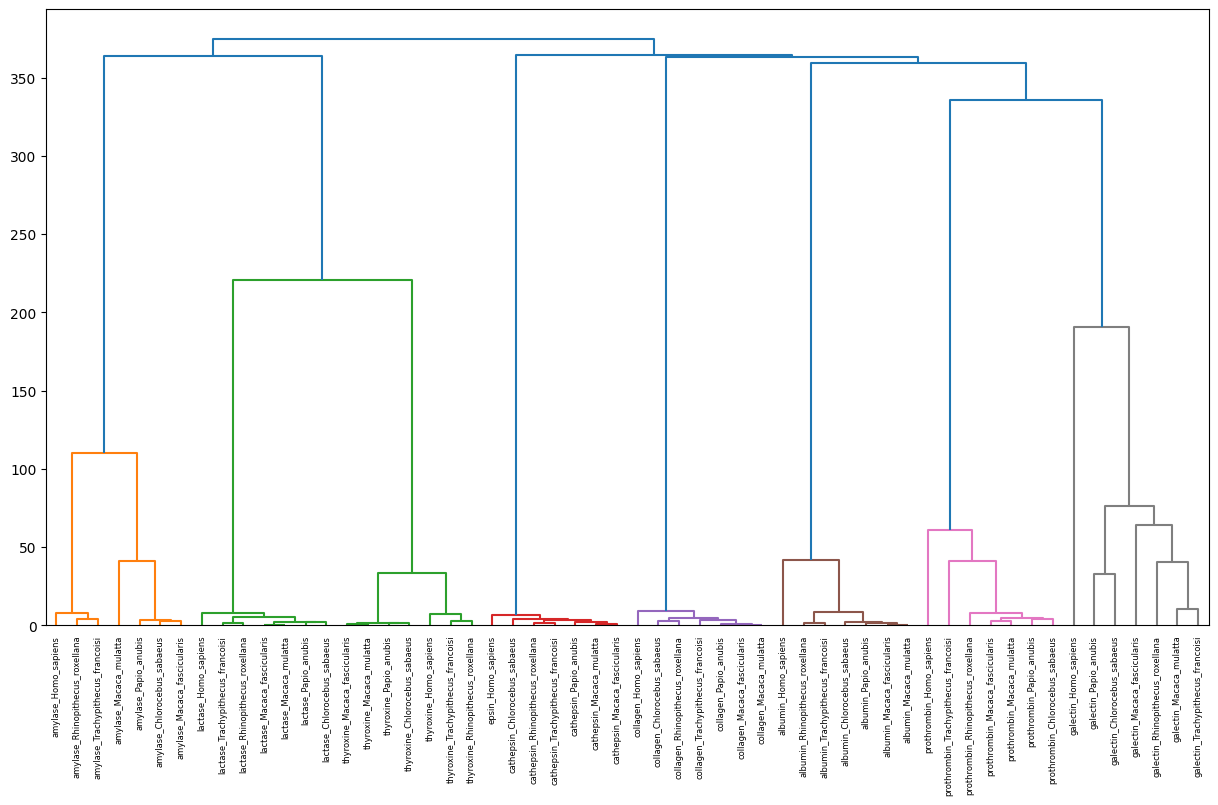

In [285]:
linkage_matrix = linkage(similarity_matrix, method='average')
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, labels=similarity_matrix.index)
plt.show()

### KMeans clustering

In [286]:
kmeans = KMeans(n_clusters=8)
clusters = kmeans.fit_predict(similarity_matrix)
cluster_df = pd.DataFrame({'Sequence': similarity_matrix.index, 'Cluster': clusters}).sort_values(by='Cluster')

In [287]:
for cluster in cluster_df['Cluster'].unique():
    print(f"Cluster {cluster}:")
    print(cluster_df[cluster_df['Cluster'] == cluster]['Sequence'].to_list())
    print()

Cluster 0:
['amylase_Rhinopithecus_roxellana', 'amylase_Trachypithecus_francoisi', 'amylase_Chlorocebus_sabaeus', 'amylase_Macaca_fascicularis', 'amylase_Macaca_mulatta', 'amylase_Papio_anubis', 'amylase_Homo_sapiens']

Cluster 1:
['lactase_Rhinopithecus_roxellana', 'lactase_Chlorocebus_sabaeus', 'lactase_Homo_sapiens', 'lactase_Papio_anubis', 'lactase_Macaca_fascicularis', 'lactase_Trachypithecus_francoisi', 'lactase_Macaca_mulatta']

Cluster 2:
['galectin_Macaca_fascicularis', 'galectin_Trachypithecus_francoisi', 'galectin_Rhinopithecus_roxellana', 'galectin_Papio_anubis', 'galectin_Homo_sapiens', 'galectin_Macaca_mulatta', 'galectin_Chlorocebus_sabaeus']

Cluster 3:
['collagen_Trachypithecus_francoisi', 'collagen_Chlorocebus_sabaeus', 'collagen_Rhinopithecus_roxellana', 'collagen_Homo_sapiens', 'collagen_Macaca_mulatta', 'collagen_Macaca_fascicularis', 'collagen_Papio_anubis']

Cluster 4:
['cathepsin_Papio_anubis', 'cathepsin_Trachypithecus_francoisi', 'cathepsin_Chlorocebus_sabaeus